# 📊  Analyse Exploratoire

|   |   |
|---|---|
| Projet  | Anticipez les besoins en consommation de bâtiments.                       |
| Date   | Novembre 2022                                                 |
| Auteur  | Ana Bernal                                                    |
| Source | [2016 Seattle Energy Benchmarking](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy) |
| Notebook numéro  | 1 sur 3                                                    |

# Préliminaires

## Librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Graphiques

In [2]:
sns.set()

## Données

In [3]:
path = './data/source/'
filename = '2016_Building_Energy_Benchmarking.csv'

df = pd.read_csv(path + filename)

# Premier aperçu

In [4]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## Taille et structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Nombre de variables par type

In [6]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

Nombre de valeurs différentes pour les variables qualitatives

In [7]:
df.select_dtypes(include=['object','bool'] ).nunique()

BuildingType                        8
PrimaryPropertyType                24
PropertyName                     3362
Address                          3354
City                                1
State                               1
TaxParcelIdentificationNumber    3268
Neighborhood                       19
ListOfAllPropertyUseTypes         466
LargestPropertyUseType             56
SecondLargestPropertyUseType       50
ThirdLargestPropertyUseType        44
YearsENERGYSTARCertified           65
DefaultData                         2
ComplianceStatus                    4
Outlier                             2
dtype: int64

## Valeurs manquantes et doublons

In [8]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [9]:
df.duplicated().sum()

0

## Inspection des données

In [10]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# Nettoyage et Analyse

## Choix initiale des variables pertinentes : 

In [11]:
variables = ['BuildingType', 'PrimaryPropertyType','Latitude', 
             'Longitude', 'YearBuilt', 'NumberofBuildings', 
             'NumberofFloors', 'PropertyGFATotal', 
             'PropertyGFAParking', 'PropertyGFABuilding(s)',
             'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 
             'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA' ,
             'ENERGYSTARScore', 
             'SiteEnergyUse(kBtu)',
             'Outlier', 'TotalGHGEmissions']

df = df[variables]

**Explication suppression variables:**

| Variable enlevée | Raison | 
|:------------------|:--------|
| DataYear (=2016), City (=Seattle), State (=WA), Comments (=na) | = pour tous les individus |
| PropertyName, Address, TaxParcelIdentificationNumber, CouncilDisctrictCode, YearsENERGYSTARCertified, ComplianceStatus| N'aident pas en principe pour nos prédictions |
| Neighborhood, ZipCode | Latitude et Longitude disent déjà la position géographique |
| ListOfAllPropertyUseTypes, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA | On décide de garder seulement l'utilisation principale et secondaire par rapport à l'aire. |
| SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu) | Mesures liées à la consommation d'énergie qui causeraient du *data leakage*|
| DefaultData | Très peu d'individus (113) avec du *default data* dans au moins un feature. On ne peut pas en tirer des infos pertinentes | 
| Outlier | Signale les high outlier et low outlier. Supprimée après avoir enlevé les individus outliers signalés par cette variable | 


**variable `'Outlier'`** Suppression des Outliers signalées par la variable `'Outlier'` qui prend comme valeurs
* High outlier,
* Low outlier, et
* na.

In [12]:
# Comptage des individus supprimés
outliers = df.loc[df['Outlier'].isin(['High outlier','Low outlier'])]
print(f'Suppression de {len(outliers)} individus')

# Suppression des outliers et de variable
df = df.loc[df['Outlier'].isna() == True]
df.drop(columns='Outlier',inplace=True)

Suppression de 32 individus


## Choix de bâtiments non destinés à l'habitation.

In [13]:
cond1 = df['BuildingType'].isin(['NonResidential', 
                                   'Nonresidential COS', 
                                   'Nonresidential WA'])
cond2 = df['BuildingType'].isin(['SPS-District K-12', 
                                   'Campus'])
cond3 = df['PrimaryPropertyType'] != 'Low-Rise Multifamily'

cond4 = df['LargestPropertyUseType'].isin(['Multifamily Housing',
                                             'Other - Lodging/Residential',
                                             'Residence Hall/Dormitory',
                                             'Residential Care Facility']) == False

cond5 = df['SecondLargestPropertyUseType'].isin(['Multifamily Housing',
                                                 'Other - Lodging/Residential',
                                                 'Residence Hall/Dormitory']) == False

mask = (cond1 | cond2) & ((cond3 & cond4) & cond5)

* **Suppression variables corrélées : aire**

    Les 3 variables LargestPropertyUseTypeGFA, PropertyGFATotal et PropertyGFABuilding(s), qui correspondent respectivement à l'aire de la zone la plus grande d'utilisation de l'immeuble, à l'aire totale et à l'aire 
    totale incluant détails comme l'aire dans les escaliers, sous-sol, etc, sont des variables très corrélés (> 0.98). Voir les calculs de corrélation linéaire ci-dessous.

    Suite à cela, on supprime les variables PropertyGFATotal (avec PrimaryPropertyType qui capte la même information que la variable LargestPropertyUseType), et PropertyGFABuilding(s).

In [14]:
print('Coefficients de correlation linéaire :')

display(df[['LargestPropertyUseTypeGFA', 
              'PropertyGFATotal',
              'PropertyGFABuilding(s)']].corr())

Coefficients de correlation linéaire :


,LargestPropertyUseTypeGFA,PropertyGFATotal,PropertyGFABuilding(s)
LargestPropertyUseTypeGFA,1.000000,0.974150,0.978448
PropertyGFATotal,0.974150,1.000000,0.989824
PropertyGFABuilding(s),0.978448,0.989824,1.000000


In [15]:
df.drop(columns=['PropertyGFABuilding(s)', ], 
          inplace=True)

# 'PropertyGFATotal' suprimée plus tard car aide à remplir des infos manquantes

In [16]:
print('Anciennes dimensions des donées :')
print(f'*Nombre de lignes : {df.shape[0]}')
print(f'*Nombre de colonnes : {df.shape[1]}')
print('-------------------------------------')
rows_old = df.shape[0]
df = df.loc[mask]

print('Nouvelles dimensions des donées :')
print(f'*Nombre de lignes : {df.shape[0]}')
print(f'*Nombre de colonnes : {df.shape[1]}')
print('-------------------------------------')
print(f'Nombre de lignes supprimées : {rows_old - df.shape[0]}')

Anciennes dimensions des donées :
*Nombre de lignes : 3344
*Nombre de colonnes : 16
-------------------------------------
Nouvelles dimensions des donées :
*Nombre de lignes : 1599
*Nombre de colonnes : 16
-------------------------------------
Nombre de lignes supprimées : 1745


## Analyse exploratoire

### Visualisations variables quantitatives

* Distributions empiriques

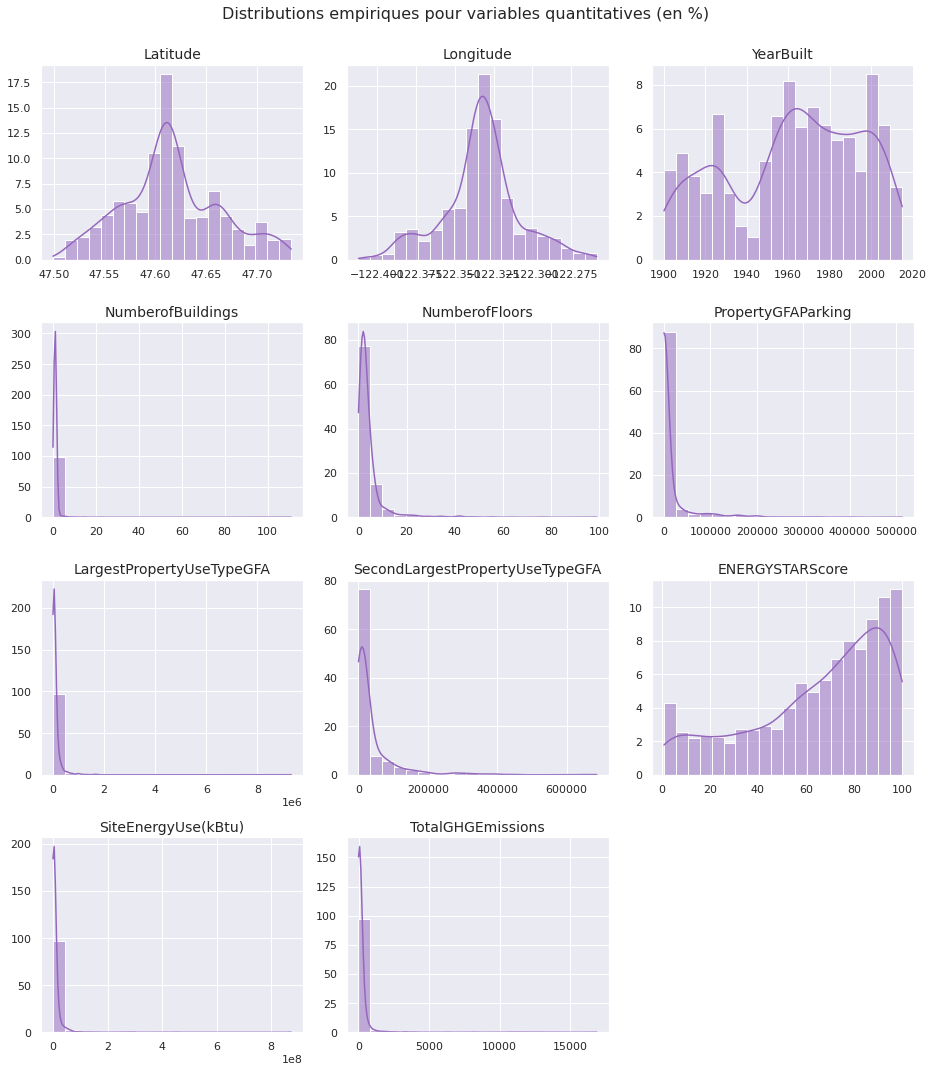

In [17]:
fig = plt.figure(figsize=(13,18))
for idx,feat in enumerate(df.select_dtypes(include=[np.number]).drop(columns=['PropertyGFATotal']).columns):
    ax = fig.add_subplot(5,3, (idx+ 1))
    sns.histplot(data=df[feat], stat='percent', 
                 bins=20, color='tab:purple',ax=ax,
                 kde=True)
    ax.set_title(feat,fontsize=14)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
fig.suptitle('Distributions empiriques pour variables quantitatives (en %)', fontsize=16,y=1)
plt.tight_layout()
fig.savefig('./img/eda_empirical_dist.png',bbox_inches='tight')

* Boxplots

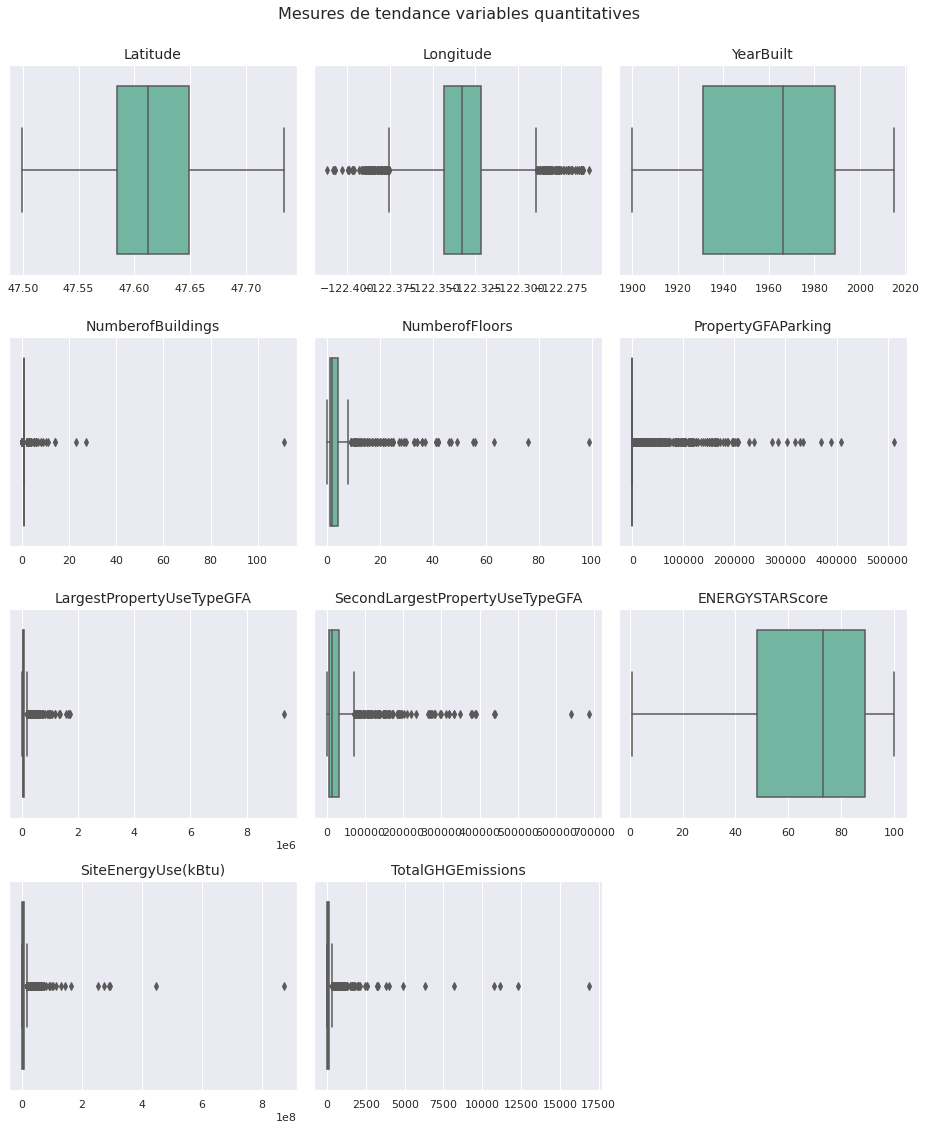

In [18]:
fig = plt.figure(figsize=(13,19))
for idx,feat in enumerate(df.select_dtypes(include=[np.number]).drop(columns=['PropertyGFATotal']).columns):
    ax = fig.add_subplot(5,3, (idx+ 1))
    sns.boxplot(x=df[feat], orient='h', ax=ax,palette='Set2')
    ax.set_title(feat,fontsize=14)
    ax.set_xlabel(None)

fig.suptitle('Mesures de tendance variables quantitatives', fontsize=16, y=1)
plt.tight_layout()
fig.savefig('./img/eda_mesures_tend.png',bbox_inches='tight')
plt.show()

### Erreurs, valeurs aberrantes et manquantes

Correction d'erreurs et suppression des valeurs aberrantes à partir des visualisations.

In [19]:
df.isna().sum()

BuildingType                         0
PrimaryPropertyType                  0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofBuildings                    2
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
LargestPropertyUseType               6
LargestPropertyUseTypeGFA            6
SecondLargestPropertyUseType       783
SecondLargestPropertyUseTypeGFA    783
ENERGYSTARScore                    543
SiteEnergyUse(kBtu)                  2
TotalGHGEmissions                    2
dtype: int64

* **Variable NumberofBuildings**

    On s'aperçoit aussi qu'il y a des erreurs : 
    - 52 lignes où le nombre d'immeubles est egal à 0. 
    - 2 lignes avec nombre d'immeubles manquante.
        
    On remplace ces zeros ou valeurs manquantes par le mode (qui est 1). De même pour la variable **nombre d'étages**: 16 individus avec 0 étages, qu'on remplace par le mode, 1.

In [20]:
# Remplacement de NumberofBuildings = 0 par le mode
df['NumberofBuildings'].replace(0, 
                                df['NumberofBuildings'].mode()[0], 
                                inplace=True)

# Remplacement de valeurs manquantes de NumberofBuildings par le mode
df['NumberofBuildings'].fillna(df['NumberofBuildings'].mode()[0], 
                               inplace=True)

* **Variable LargestPropertyUseType et LargestPropertyUseTypeGFA**
    
    - On remplace les valeurs manquantes (6 individus seulement) ici par les valeurs de la variable PrimaryPropertyType, qui ne sont pas manquantes.

    - On remplace l'aire manquante (LargestPropertyUseTypeGFA) par l'aire totale PropertyGFATotal.

In [21]:
vars_to_display = ['LargestPropertyUseType',
                   'LargestPropertyUseTypeGFA',
                   'PrimaryPropertyType',
                   'PropertyGFATotal']

display(df.loc[df['LargestPropertyUseType'].isna() == True,vars_to_display])

temp_index = df.loc[df['LargestPropertyUseType'].isna() == True].index

,LargestPropertyUseType,LargestPropertyUseTypeGFA,PrimaryPropertyType,PropertyGFATotal
353,NaN,NaN,Self-Storage Facility,111445
578,NaN,NaN,Small- and Mid-Sized Office,63150
1147,NaN,NaN,Hotel,61721
2414,NaN,NaN,Small- and Mid-Sized Office,48350
2459,NaN,NaN,Restaurant,28800
2670,NaN,NaN,Mixed Use Property,20760


In [22]:
mask_type = df['LargestPropertyUseType'].isna() == True
mask_area = df['LargestPropertyUseTypeGFA'].isna() == True

values_type = df.loc[mask_type,'PrimaryPropertyType'].copy()
values_area = df.loc[mask_area,'PropertyGFATotal'].copy()

df.loc[mask_type,'LargestPropertyUseType'] = values_type
df.loc[mask_area,'LargestPropertyUseTypeGFA'] = values_area

display(df.loc[temp_index,vars_to_display])

,LargestPropertyUseType,LargestPropertyUseTypeGFA,PrimaryPropertyType,PropertyGFATotal
353,Self-Storage Facility,111445.0,Self-Storage Facility,111445
578,Small- and Mid-Sized Office,63150.0,Small- and Mid-Sized Office,63150
1147,Hotel,61721.0,Hotel,61721
2414,Small- and Mid-Sized Office,48350.0,Small- and Mid-Sized Office,48350
2459,Restaurant,28800.0,Restaurant,28800
2670,Mixed Use Property,20760.0,Mixed Use Property,20760


In [23]:
# Nous pouvons maintenant supprimer ces colonnes :
df.drop(columns=['PropertyGFATotal', 'PrimaryPropertyType'], 
          inplace=True)

* **Valeurs manquantes pour**  émissions de gaz et consommation d'énergie.

    Très peu de valeurs manquantes : On les remplit avec la moyenne.

In [24]:
df['TotalGHGEmissions'].fillna(df['TotalGHGEmissions'].mean(), inplace=True)
df['SiteEnergyUse(kBtu)'].fillna(df['SiteEnergyUse(kBtu)'].mean(), inplace=True)
# Pour les bâtiments sans deuxième utilisation, on définit l'aire correspondante
# à cette utilisation comme = 0.
df['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)

In [25]:
df.isna().sum()

BuildingType                         0
Latitude                             0
Longitude                            0
YearBuilt                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFAParking                   0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType       783
SecondLargestPropertyUseTypeGFA      0
ENERGYSTARScore                    543
SiteEnergyUse(kBtu)                  0
TotalGHGEmissions                    0
dtype: int64

### Suppression des valeurs aberrantes

En se basant sur les visualisations des distributions et boîtes à moustaches ci dessus, on détermine des seuils pour supprimer certains individus.

In [26]:
outliers_max_dict = {'NumberofBuildings':20,
                     'NumberofFloors':80,  
                     'PropertyGFAParking':400000, 
                     'LargestPropertyUseTypeGFA':8*1e6,
                     'SiteEnergyUse(kBtu)':1.5*1e8, 
                     'TotalGHGEmissions':3000,
                     'SecondLargestPropertyUseTypeGFA':500000
                     } 
 
print(f"{'Variable':<32}", "Nb. d'individus supprimés")
print(f"{'-'*60}")
sup_total = 0
for feat in outliers_max_dict:
    outli = df.loc[df[feat]>outliers_max_dict[feat]]
    numb_aber = outli.shape[0]
    sup_total += outli.shape[0]
    df.drop(index = outli.index, inplace=True)
    
    print(f'{feat:<32}', numb_aber)
        
print(f"{'-'*60}")
print(f"Total supprimés: {sup_total}")

Variable                         Nb. d'individus supprimés
------------------------------------------------------------
NumberofBuildings                3
NumberofFloors                   1
PropertyGFAParking               2
LargestPropertyUseTypeGFA        0
SiteEnergyUse(kBtu)              6
TotalGHGEmissions                6
SecondLargestPropertyUseTypeGFA  1
------------------------------------------------------------
Total supprimés: 19


In [27]:
# on supprime les valeurs négatifs d'émission des gaz.
print(f"{df.loc[df['TotalGHGEmissions']<0].shape[0]} individus supprimés")
df = df.loc[df['TotalGHGEmissions']>=0]

1 individus supprimés


Il ne reste que les valeurs manquantes de ENERGYSTARScore, qui sera l'objet d'une regression. Nous passons aux variables qualitatives : 

#### Étude des correlations
Dans le heatmap suivant qui reflète les coefficients de correlation nous pouvons observer:

1. Les variables qui ont à voir avec l'aire (total, parking, etc.) et la taille (nombre d'étages) ont un haut coefficient de correlation entre elles. Ce qui est naturel.

2. L'aire de l'immeuble est en correlation avec la consommation d'énergie. C'était aussi un fait qu'on pouvait s'attendre.

2. Le EnergyStar score est anti-corrélé à l'utilisation d’énergie du bâtiment et à l'emission des gazes, ce qui est rassurant, puisque un haut score veut dire normalement que la bâtiment est économe en utilisation d’énergie. 

3. Enfin l'emission de gazes est corrélé à l'utilisation de l'énergie, ce qui est pertinent.

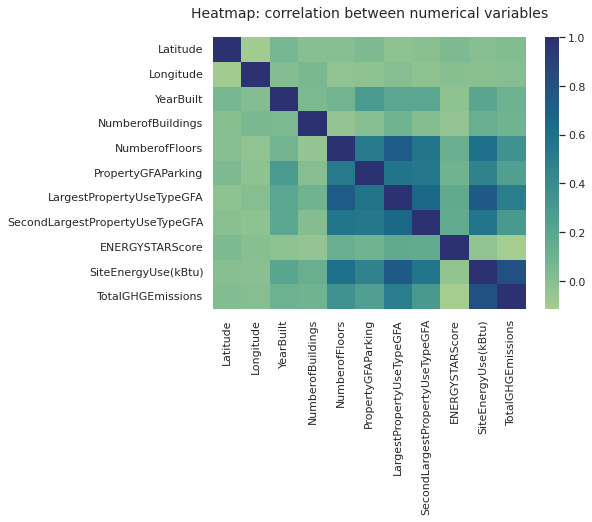

In [28]:
fig,ax = plt.subplots(figsize=(7,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            cmap='crest', 
            ax=ax)
ax.set_title('Heatmap: correlation between numerical variables', 
             fontsize=14,
             y=1.05)
fig.savefig('./img/eda_corr_heatmap.png',bbox_inches='tight')
plt.show()

## Analyse variables qualitatives

Les variables qualitatives sont les suivantes :

In [29]:
df.select_dtypes(include=[object]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 0 to 3375
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  1579 non-null   object
 1   LargestPropertyUseType        1579 non-null   object
 2   SecondLargestPropertyUseType  804 non-null    object
dtypes: object(3)
memory usage: 49.3+ KB


Nombre de valeurs différents qui prend chaque catégorie

In [30]:
df.select_dtypes(include=[object]).nunique()

BuildingType                     5
LargestPropertyUseType          53
SecondLargestPropertyUseType    44
dtype: int64

### Visualisations

* **Type d'immeuble:** variable `BuildingType`

    La plupart d'immeuble sont de type non résidentiel pour cette variable. Elle n'est pas très parlante.

In [31]:
df['BuildingType'].value_counts(normalize=True)

NonResidential        0.875871
SPS-District K-12     0.061431
Nonresidential COS    0.051932
Campus                0.010133
Nonresidential WA     0.000633
Name: BuildingType, dtype: float64

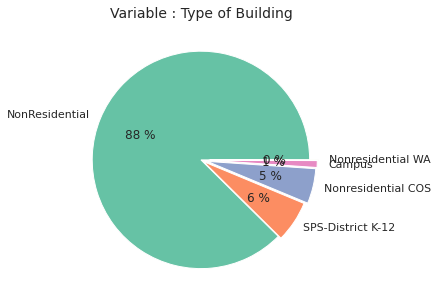

In [32]:
temp_data = df['BuildingType'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(5,5))

ax.pie(labels=temp_data.index,
       explode=(0,0.03,0.06,0.07,0.08),
       x=temp_data, 
       autopct='%.0f %%',
       textprops={},
       colors=sns.color_palette("Set2")
       )

ax.set_title('Variable : Type of Building', fontdict={'fontsize': 14})
fig.savefig('./img/eda_type_piech.png',bbox_inches='tight')
plt.show()

D'après cette analyse, comme 89 % des individus prennent la même valeur (NonResidential) pour cette variable (Type of Building), on décide de supprimer la variable.

In [33]:
df.drop(columns='BuildingType', inplace=True)

* **Type d'usage d'espace plus grand :** variable `LargestPropertyUseType`

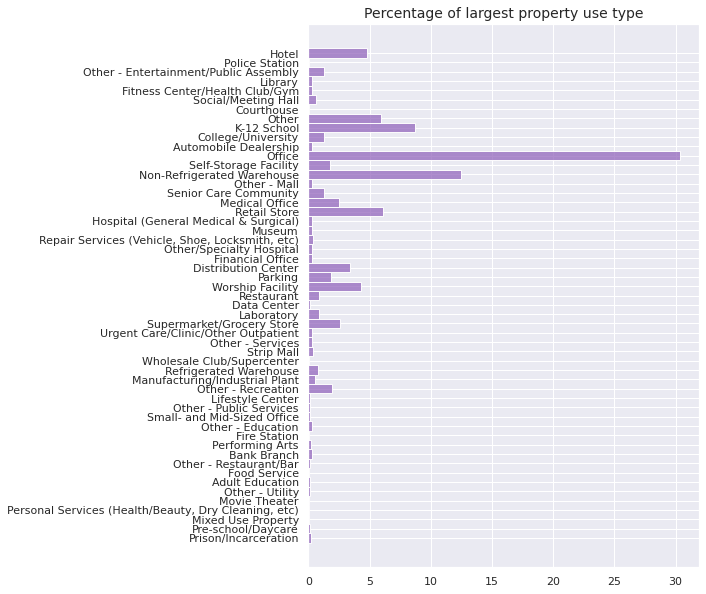

In [34]:
fig, ax = plt.subplots(figsize=(7,10))

sns.histplot(data=df, y='LargestPropertyUseType',
             stat='percent' ,ax=ax, color='tab:purple')
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Percentage of largest property use type', fontsize=14)
fig.savefig('./img/eda_largesttype.png',bbox_inches='tight')
plt.show()

Cette variable prend 56 valeurs différents. Ce grand nombre de valeurs différents n'est pas idéal pour notre prédiction. Nous allons créer une nouvelle variable `BuildType` qui regroupe certains de ces valeurs dans des 19 catégories plus larges. Ces catégories sont définies dans le dictionnaire suiant :

In [35]:
build_type = {'Hotel' : ['Hotel'],
              'Police_fire' : ['Police Station', 'Fire Station'],
              'Public_assembly_enterta' : ['Other - Entertainment/Public Assembly', 
                                           'Other - Recreation'],
              'Culture' : ['Library', 'Museum', 'Performing Arts', 
                           'Movie Theater', 'Worship Facility'],
              'Gym' : ['Fitness Center/Health Club/Gym'],
              'Social/courthouse' : ['Social/Meeting Hall','Courthouse'],
              'Other' : ['Other', 'Other - Services', 'Other - Public Services', 
                         'Other - Utility'],
              'Education' : ['K-12 School', 'College/University', 'Other - Education',
                             'Adult Education', 'Pre-school/Daycare'],
              'Mall/Store' : ['Automobile Dealership', 'Other - Mall', 'Retail Store',
                              'Strip Mall', 'Lifestyle Center', 
                              'Repair Services (Vehicle, Shoe, Locksmith, etc)', 
                              'Personal Services (Health/Beauty, Dry Cleaning, etc)'],
              'Office' : ['Office', 'Medical Office', 'Financial Office', 
                          'Small- and Mid-Sized Office'],
              'Storage/Distribution' : ['Self-Storage Facility', 'Non-Refrigerated Warehouse', 
                                        'Refrigerated Warehouse', 'Distribution Center'],
              'Hospital/Health/Care' : ['Senior Care Community', 
                                        'Hospital (General Medical & Surgical)', 
                                        'Other/Specialty Hospital', 
                                        'Urgent Care/Clinic/Other Outpatient'],
              'Parking' : ['Parking'],
              'Laboratory' : ['Laboratory'],
              'Grocery Store' : ['Supermarket/Grocery Store', 'Wholesale Club/Supercenter'],
              'Restaurant' : ['Other - Restaurant/Bar', 'Food Service','Restaurant'],
              'Manufacturing' : ['Manufacturing/Industrial Plant'],
              'Bank/Data' : ['Bank Branch', 'Data Center'],
              'Prison' : ['Prison/Incarceration']}

In [36]:
# Assigner ces catégories plus larges
for key in build_type:
    mask = df['LargestPropertyUseType'].isin(build_type[key])
    df.loc[mask,'BuildType'] = key

Visualisation de variable BuildType:

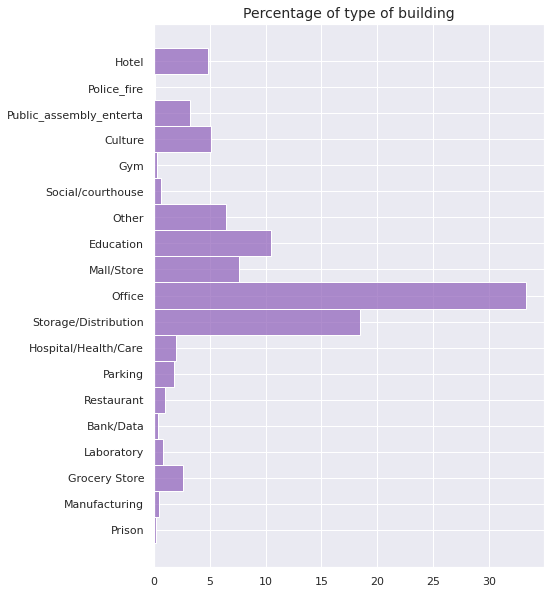

In [37]:
fig, ax = plt.subplots(figsize=(7,10))

sns.histplot(data=df, y='BuildType',
             stat='percent' ,ax=ax, color='tab:purple')
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Percentage of type of building', fontsize=14)
fig.savefig('./img/eda_buildtype.png',bbox_inches='tight')
plt.show()

Suppression de variable `LargestPropertyUseType`

In [38]:
df.drop(columns='LargestPropertyUseType', inplace=True)

* **Type d'usage du second espace le plus grand :** variable `SecondLargestPropertyUseType`

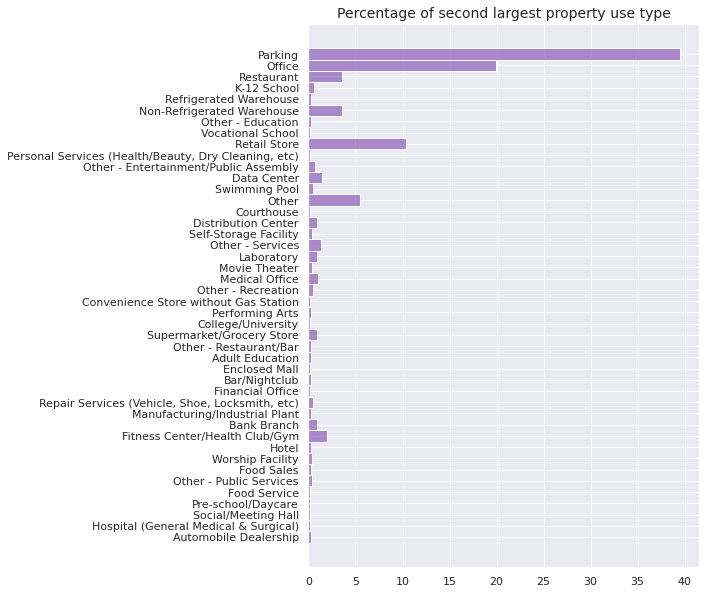

In [39]:
fig, ax = plt.subplots(figsize=(7,10))

sns.histplot(data=df, y='SecondLargestPropertyUseType',
             stat='percent' ,ax=ax, color='tab:purple')
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Percentage of second largest property use type', fontsize=14)
fig.savefig('./img/eda_seclargtype.png',bbox_inches='tight')
plt.show()

In [40]:
df['SecondLargestPropertyUseType'].fillna('NoSecondType', 
                                          inplace=True)

In [41]:
df['SecondLargestPropertyUseType'].isna().sum()

0

Cette variable prend 47 valeurs différents. Ce grand nombre de valeurs différents n'est pas idéal pour notre prédiction. Nous allons créer une nouvelle variable `BuildType` qui regroupe certains de ces valeurs dans des 19 catégories plus larges. Ces catégories sont définies dans le dictionnaire suiant :

In [42]:
build_sec_type = {'NoSecondType' : ['NoSecondType'], 
                  'Parking' : ['Parking'], 
                  'Office' : ['Office'],
                  'Warehouse': ['Refrigerated Warehouse', 'Non-Refrigerated Warehouse'],
                  'Education' :['K-12 School','Other - Education', 'Vocational School',
                                'College/University','Adult Education','Pre-school/Daycare'],
                  'Public Assemb_entert' : ['Other - Entertainment/Public Assembly',
                                            'Movie Theater',
                                            'Other - Recreation',
                                            'Bar/Nightclub'],
                  'Hotel' : ['Hotel'],
                  'Culture' : ['Performing Arts','Worship Facility'],
                  'Social/courthouse' : ['Courthouse','Social/Meeting Hall'],
                  'Other' : ['Other','Other - Services','Other - Public Services'],
                  'Mall/Store' : ['Retail Store',
                                  'Personal Services (Health/Beauty, Dry Cleaning, etc)',
                                  'Convenience Store without Gas Station',
                                  'Enclosed Mall',
                                  'Repair Services (Vehicle, Shoe, Locksmith, etc)',
                                  'Automobile Dealership'],
                  'Office' : ['Medical Office','Financial Office', 'Office'],
                  'Storage/Distribution' : ['Distribution Center','Self-Storage Facility'],
                  'Hospital/Health/Care' : ['Hospital (General Medical & Surgical)'],
                  'Laboratory' : ['Laboratory',],
                  'Grocery Store' : ['Supermarket/Grocery Store','Food Sales'],
                  'Restaurant' : ['Restaurant','Other - Restaurant/Bar','Food Service'],
                  'Manufacturing' : ['Manufacturing/Industrial Plant',],
                  'Bank/Data' : ['Data Center','Bank Branch'],
                  'Sports' : ['Swimming Pool','Fitness Center/Health Club/Gym']}

In [43]:
# Assigner ces catégories plus larges
for key in build_sec_type:
    mask = df['SecondLargestPropertyUseType'].isin(build_sec_type[key])
    df.loc[mask,'BuildSecType'] = key

Visualisation de variable BuildType:

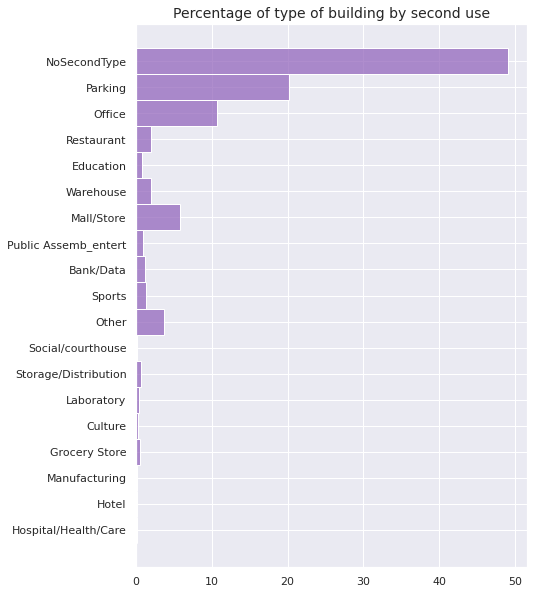

In [44]:
fig, ax = plt.subplots(figsize=(7,10))

sns.histplot(data=df, y='BuildSecType',
             stat='percent' ,ax=ax, color='tab:purple')
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Percentage of type of building by second use', fontsize=14)
fig.savefig('./img/eda_buildsectype.png',bbox_inches='tight')
plt.show()

Suppression de variable `SecondLargestPropertyUseType`

In [45]:
df.drop(columns='SecondLargestPropertyUseType', inplace=True)

## Taille finale des données

In [46]:
print('Nombre de variables')

num_feat = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'* Quantitatives: {len(num_feat)}')
cat_feat = df.select_dtypes(include=[object]).columns.tolist()
print(f'* Qualitatives: {len(cat_feat)}')

print(f'Nombre de lignes: {df.shape[0]}')

Nombre de variables
* Quantitatives: 11
* Qualitatives: 2
Nombre de lignes: 1579


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1579 entries, 0 to 3375
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Latitude                         1579 non-null   float64
 1   Longitude                        1579 non-null   float64
 2   YearBuilt                        1579 non-null   int64  
 3   NumberofBuildings                1579 non-null   float64
 4   NumberofFloors                   1579 non-null   int64  
 5   PropertyGFAParking               1579 non-null   int64  
 6   LargestPropertyUseTypeGFA        1579 non-null   float64
 7   SecondLargestPropertyUseTypeGFA  1579 non-null   float64
 8   ENERGYSTARScore                  1043 non-null   float64
 9   SiteEnergyUse(kBtu)              1579 non-null   float64
 10  TotalGHGEmissions                1579 non-null   float64
 11  BuildType                        1578 non-null   object 
 12  BuildSecType        

## Exporter données

In [48]:
path = './data/cleaned/'
filename = 'building_data_clean.csv'

In [49]:
df.to_csv(path + filename, index = False)